# Medical Appointment No Shows Capstone

## 3. EXPLORATORY DATA ANALYSIS

#####  Developing a deeper understanding of the model development data set and preparing to develop a solid model.

In [75]:
#Import necessary libraries
import pandas as pd
import numpy as np

# Plotting modules
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Analysing datetime
from datetime import datetime as dt

# File system manangement
import os,sys

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Interactive Shell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

#Pandas profiling
from pandas_profiling import ProfileReport

%matplotlib inline

In [69]:
path = 'data/step2_output.csv'
df = pd.read_csv(path, index_col=None, parse_dates=["ScheduledDay","AppointmentDay"])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110517 entries, 0 to 110516
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110517 non-null  int64         
 1   AppointmentId   110517 non-null  int64         
 2   Gender          110517 non-null  object        
 3   ScheduledDay    110517 non-null  datetime64[ns]
 4   AppointmentDay  110517 non-null  datetime64[ns]
 5   Age             110517 non-null  int64         
 6   Neighborhood    110517 non-null  object        
 7   Scholarship     110517 non-null  int64         
 8   Hypertension    110517 non-null  int64         
 9   Diabetes        110517 non-null  int64         
 10  Alcoholism      110517 non-null  int64         
 11  Handicap        110517 non-null  int64         
 12  SMSSent         110517 non-null  int64         
 13  NoShow          110517 non-null  object        
 14  WaitingDays     110517 non-null  int

In [7]:
df.loc[0:1000:100].head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow,WaitingDays
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29 18:38:08,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
100,166338799398515,5574764,F,2016-04-12 15:47:45,2016-04-29 00:00:00,20,BONFIM,0,0,0,0,0,1,No,16
200,733852941987295,5639942,M,2016-04-29 09:51:36,2016-04-29 09:51:36,70,CENTRO,0,1,0,0,0,0,No,0
300,4286766728467,5641489,F,2016-04-29 13:45:04,2016-04-29 13:45:04,32,ANDORINHAS,0,0,0,0,0,0,No,0
400,95216824697312,5627333,M,2016-04-27 09:22:00,2016-04-29 00:00:00,36,MARIA ORTIZ,0,0,0,0,0,0,No,1


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110517.0,1.474886e+14,2.560841e+14,39217.0,4.172457e+12,3.172848e+13,9.438963e+13,9.999816e+14
AppointmentId,110517.0,5.675305e+06,7.129559e+04,5030230.0,5.640286e+06,5.680571e+06,5.725523e+06,5.790484e+06
Age,110517.0,3.708420e+01,2.310325e+01,0.0,1.800000e+01,3.700000e+01,5.500000e+01,1.000000e+02
Scholarship,110517.0,9.827447e-02,2.976868e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hypertension,110517.0,1.972547e-01,3.979280e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110517.0,7.187130e-02,2.582759e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110517.0,3.040256e-02,1.716931e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handicap,110517.0,2.221378e-02,1.614428e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMSSent,110517.0,3.210456e-01,4.668804e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
WaitingDays,110517.0,9.532588e+00,1.502783e+01,0.0,0.000000e+00,3.000000e+00,1.400000e+01,1.780000e+02


##  BUILD DATA PROFILES — PLOTS AND TABLES

## Distribution Plots

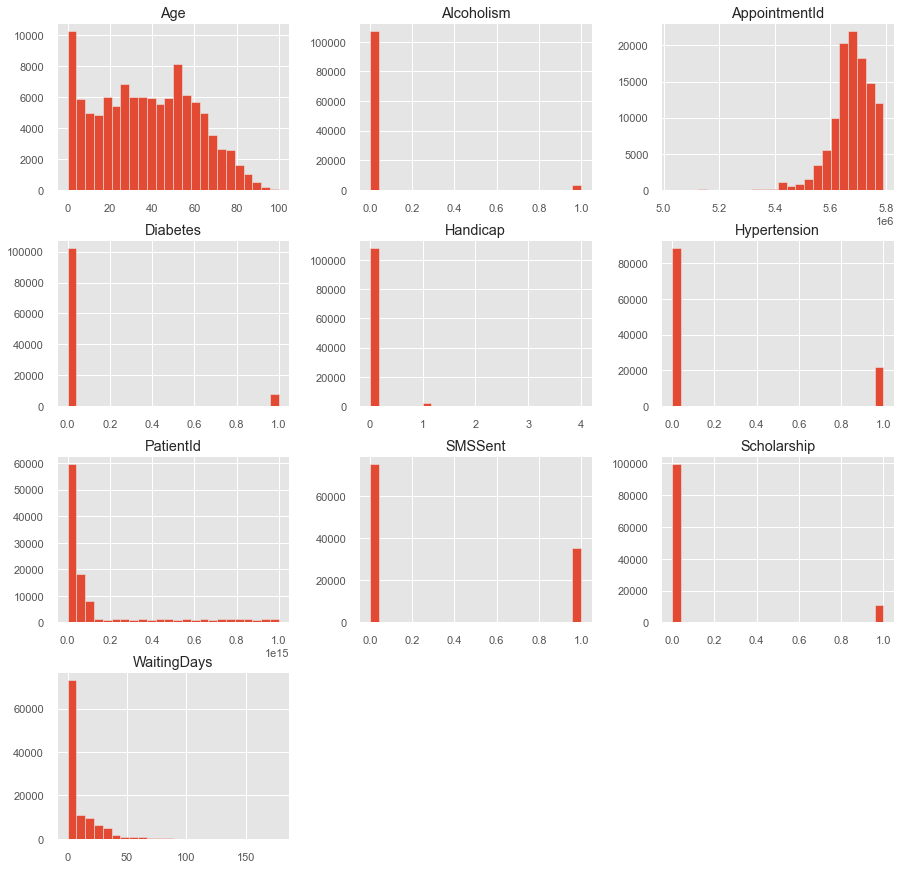

In [74]:
hist = df.hist(bins = 24, figsize = (15,15))

#### BarPlot

<AxesSubplot:xlabel='NoShow', ylabel='Age'>

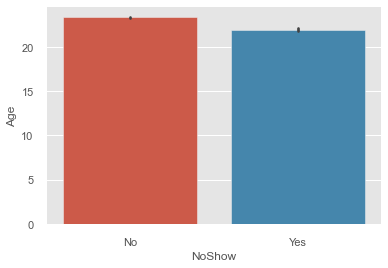

In [76]:
sns.barplot(x='NoShow',y='Age',estimator=np.std, data=df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

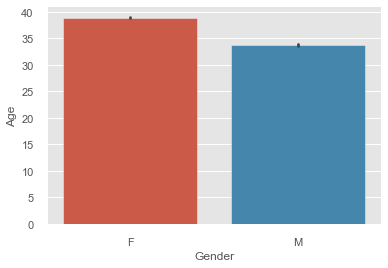

In [77]:
sns.barplot(x='Gender',y='Age', data=df)


#### CountPlots

<AxesSubplot:xlabel='Gender', ylabel='count'>

Number of patients that are male:  71830
Number of patients that are female:  38687


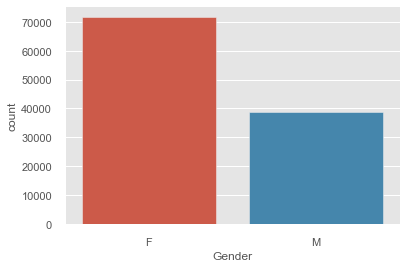

In [78]:
sns.countplot(x='Gender', data=df,label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ', M)
print('Number of patients that are female: ', F)

Number of patients that didnt show up:  88203
Number of patients that showed up:  22314


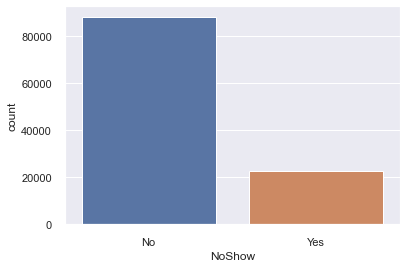

In [41]:
#Univariate analysis target.
sns.countplot(x='NoShow', data=df)

N, Y = df['NoShow'].value_counts()
print('Number of patients that didnt show up: ', N)
print('Number of patients that showed up: ', Y)

Messages Not Sent:  75036
Messages Sent:  35481


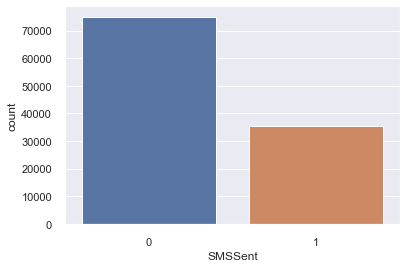

In [46]:
#Countplot SMSSENT.
sns.countplot(x='SMSSent', data=df)

NotSent, Sent = df['SMSSent'].value_counts()
print('Messages Not Sent: ', NotSent)
print('Messages Sent: ', Sent)

In [44]:
df['SMSSent'].value_counts()

0    75036
1    35481
Name: SMSSent, dtype: int64

#### BoxPlots

<AxesSubplot:xlabel='NoShow', ylabel='Age'>

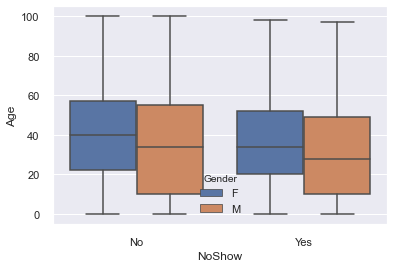

In [52]:
sns.boxplot(x='NoShow', y='Age', hue='Gender', data=df)


<AxesSubplot:xlabel='SMSSent', ylabel='Age'>

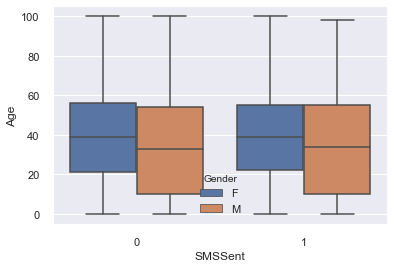

In [54]:
sns.boxplot(x='SMSSent', y='Age', hue='Gender', data=df)


#### ViolinPlots

<AxesSubplot:xlabel='SMSSent', ylabel='Age'>

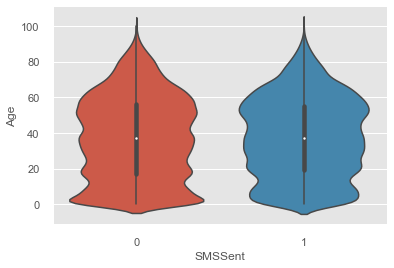

In [83]:
sns.violinplot(x='SMSSent', y='Age',data=df)

<AxesSubplot:xlabel='NoShow', ylabel='Age'>

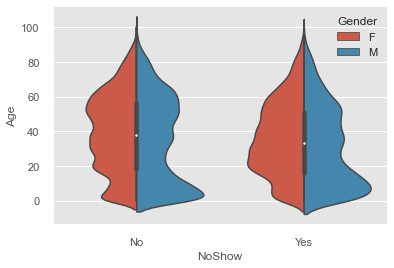

In [82]:
sns.violinplot(x='NoShow', y='Age', hue='Gender', split=True,data=df)

#### SwarmPlot

In [ ]:
#sns.violinplot(x="NoShow", y="Age",data=df)
#sns.swarmplot(x="NoShow", y="Age",data=df, color='black')
#not good for large data sets. Computationally expensive

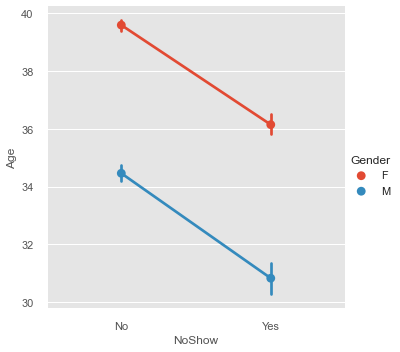

In [93]:
sns.factorplot(x="NoShow", y="Age", hue="Gender",kind="point", data=df);

#### StripPlot

<AxesSubplot:xlabel='NoShow', ylabel='Age'>

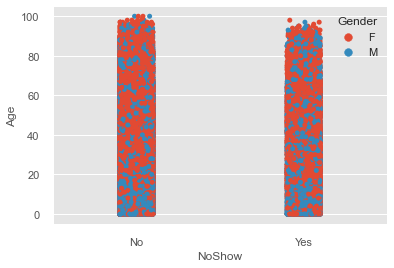

In [88]:
sns.stripplot(x="NoShow",y="Age", jitter=True, hue="Gender",data=df)

In [21]:
df.groupby('Neighborhood').sum()

,PatientId,AppointmentId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,WaitingDays
Neighborhood,,,,,,,,,,
AEROPORTO,315677206301430,45263920,425,0,2,0,0,0,1,113
ANDORINHAS,338236310079121728,12819994381,81212,323,586,299,52,87,567,18259
ANTÔNIO HONÓRIO,36910083228237056,1536124664,9985,14,5,3,0,1,93,3521
ARIOVALDO FAVALESSA,42781798802318096,1603374140,9263,52,37,19,14,11,57,1841
BARRO VERMELHO,60213492392655064,2405454953,19052,0,57,23,2,6,143,2821
...,...,...,...,...,...,...,...,...,...,...
SÃO JOSÉ,307622024631614272,11239903338,66339,180,512,238,82,79,668,11145
SÃO PEDRO,340028160108563712,13932869521,88223,321,670,249,150,97,696,11664
TABUAZEIRO,429773720097775360,17784675257,109512,537,712,240,57,85,959,26579


#### Groupby
- Groupby allows you to group together rows based off of a column and perform an aggregate function on them.

In [23]:
dfas = df.groupby('Scholarship')['Age'].mean()
dfas

Scholarship
0    37.789115
1    30.616242
Name: Age, dtype: float64

In [12]:
df.groupby('Neighborhood')['SMSSent'].sum().sort_values(ascending=False)[:5]

Neighborhood
JARDIM CAMBURI     2575
MARIA ORTIZ        2101
RESISTÊNCIA        1503
JARDIM DA PENHA    1424
ITARARÉ            1151
Name: SMSSent, dtype: int64

<AxesSubplot:xlabel='Age'>

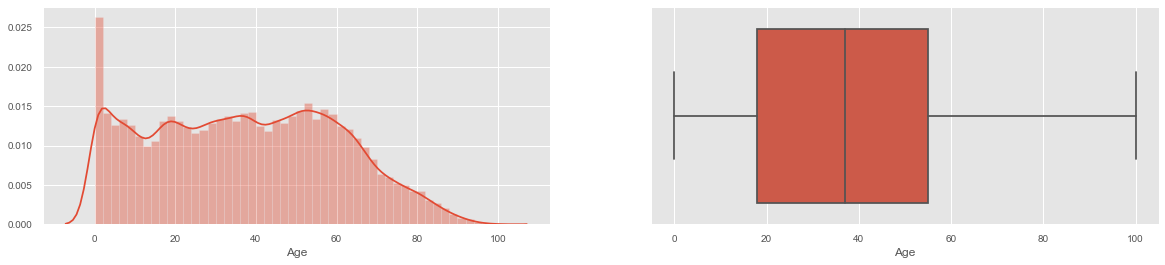

In [18]:
#Univariate analysis age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['Age'])

f.add_subplot(1,2,2)
sns.boxplot(df['Age'])

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

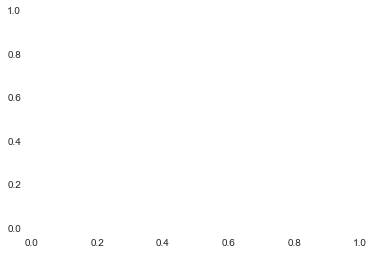

In [18]:
f = plt.figure(figsize=(20,4))
f.add_subplot(1,3,1)

df['Gender'].value_counts().plot('bar', color='red')
f.add_subplot(1,3,2)

df['SMSSent'].value_counts().plot('bar', color='green')
f.add_subplot(1,3,3)

sns.countplot(df['Neighborhood'], color='yellow')

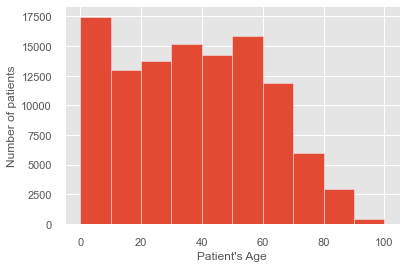

In [80]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
_= plt.hist(df['Age'], bins=bin_edges)
_= plt.xlabel('Patient\'s Age')
_= plt.ylabel('Number of patients')
plt.show()

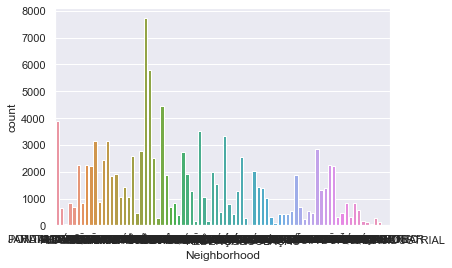

In [7]:
#select categorical variables only
df_cat = df.select_dtypes(include = 'object').copy()
#get counts of each variable value
df_cat.Neighborhood.value_counts()
#count plot for one variable
sns.countplot(data = df_cat, x = 'Neighborhood')

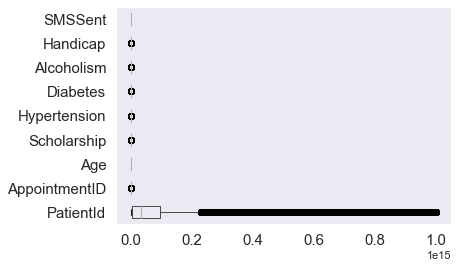

In [8]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

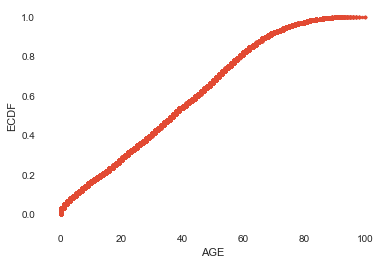

In [7]:
def ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

b = df_le2['Age']

xa, ye = ecdf(b)

# Generate plot
_= plt.plot(xa, ye, marker='.', linestyle='none')

# Label the axes
_= plt.ylabel('ECDF')
_= plt.xlabel('AGE')


# Display the plot
plt.show()

In [ ]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='Age', y='NoShow', data=df)

_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


In [ ]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
np.percentile(df['Age'],percentiles)

In [ ]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

In [10]:
#sns.lmplot(x='Age', y='NoShow', data=df)

# Display the plot
#plt.show()


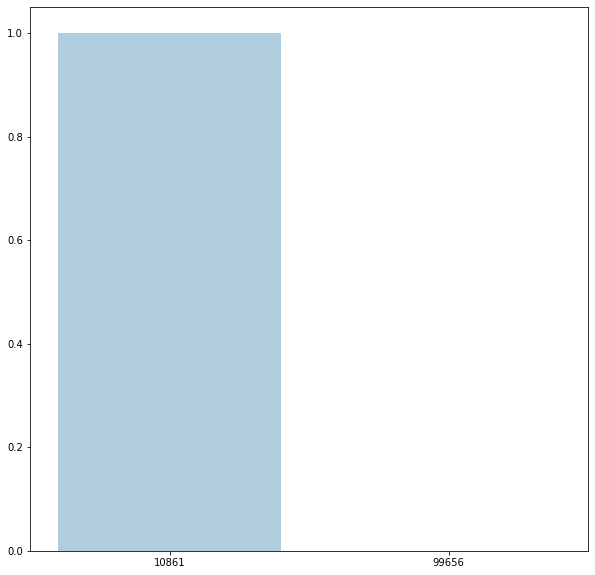

In [46]:
# Uncomment the following code to get your visualization started 
f, ax = plt.subplots(figsize=(10, 10))

# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Scholarship.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Scholarship)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

####  DATA RELATIONSHIPS

In [ ]:
#Ccorrelation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [ ]:
#pair plots
g = sns.pairplot(df)

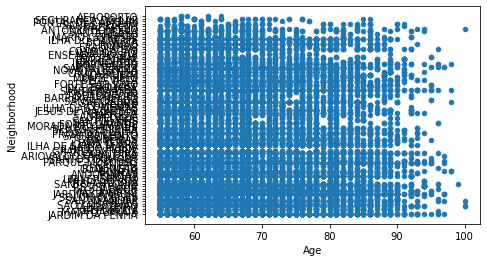

In [35]:
df[df.Age >= 55].plot.scatter('Age','Neighborhood')

### IDENTIFICATION AND CREATION OF FEATURES

In [47]:
corr = df.corr()

In [48]:
corr.round(2).style.background_gradient(cmap='coolwarm')

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent
PatientId,1.000000,0.000000,-0.000000,-0.000000,-0.010000,0.000000,0.010000,-0.010000,-0.010000
AppointmentID,0.000000,1.000000,-0.020000,0.020000,0.010000,0.020000,0.030000,0.010000,-0.260000
Age,-0.000000,-0.020000,1.000000,-0.090000,0.500000,0.290000,0.100000,0.080000,0.010000
Scholarship,-0.000000,0.020000,-0.090000,1.000000,-0.020000,-0.020000,0.040000,-0.010000,0.000000
Hypertension,-0.010000,0.010000,0.500000,-0.020000,1.000000,0.430000,0.090000,0.080000,-0.010000
Diabetes,0.000000,0.020000,0.290000,-0.020000,0.430000,1.000000,0.020000,0.060000,-0.010000
Alcoholism,0.010000,0.030000,0.100000,0.040000,0.090000,0.020000,1.000000,0.000000,-0.030000
Handicap,-0.010000,0.010000,0.080000,-0.010000,0.080000,0.060000,0.000000,1.000000,-0.020000
SMSSent,-0.010000,-0.260000,0.010000,0.000000,-0.010000,-0.010000,-0.030000,-0.020000,1.000000


k-means finds a specified number of clusters in the samples.

In [51]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df['Age','PatientId'])

KeyError: ('Age', 'PatientId')

In [8]:
profile = ProfileReport(df, title='Med NoShow Profiling Report')

In [9]:
profile.to_notebook_iframe()